<a href="https://colab.research.google.com/github/tanay47/Airbnb-Data-Analysis/blob/main/Airbnb_Bookings_Analysis_Final_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

***Airbnb is an online space where person rent their unused rooms or entire house. Irrespective owning any of the property, Airbnb acts as a broker, receiving margin from each booking. Since 2008 Airbnb is growing at fast paced, and now it has over 7 million accommodations in more than 191 countries and regions globally.***

***Now we are going to experiment and understand relationship between different factors in New York City.***


In [1]:
# Importing useful libraries in python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Mounting drive below
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading Airbnb NYC dataset
# path = '/content/drive/MyDrive/data_eda/'
# dataset = pd.read_csv(path + 'Copy of Airbnb NYC 2019.csv')

file_path = '/content/drive/MyDrive/Colab Notebooks/Module 1/Airbnb booing Analysis – Tanay tupe/Airbnb NYC 2019.csv'
dataset = pd.read_csv(file_path)

#file_path = '/content/drive/MyDrive/Data Science/Capstone Project 1/Airbnb_NYC_2019.csv'
#dataset = pd.read_csv(file_path)

In [4]:
# Checking shape of dataset

dataset.shape

(48895, 16)

In [5]:
# Checking basic info about dataset
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# Viewing head of the dataset
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
# Finding null values in dataset
dataset.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**By checking above, got to know that we have max no. of nulls in last_review and reviews_per_month.**

**After seeing initial data, last_review column is something related to datetype and have more nulls , so I think we can drop this column for further analysis. Also, host_name doesn't seem required column for analysis so dropping it too.**

In [8]:
# Create a copy of original dataset and use that as the main dataset
airbnb = dataset.copy()

In [9]:
# Dropped last_review, host_name column
airbnb.drop(['last_review','host_name'], axis=1, inplace=True)

For null values in reviews_per_month, replacing it by '0' and for null values in name replacing it by 'Not Available'.

In [10]:
# Replacing null values in name, reviews_per_month
airbnb['name'].fillna("Not Available", inplace=True)
airbnb['reviews_per_month'].fillna(0, inplace=True)


In [11]:
# Checking if still any null value present in dataset
airbnb.isnull().sum()

id                                0
name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**Now, we can clearly see there are no null values in dataset.**

**To have a sensible data to work with, we will check and eliminate duplicate observations/records.**

In [12]:
# Check and eliminate duplicate observations/records

dupli_rows_df = airbnb[airbnb.duplicated()]
print(f"Number of duplicate record is", {dupli_rows_df.shape}) 

Number of duplicate record is {(0, 14)}


**Great, we have no duplicate observations/records. Moving ahead.**

In [13]:
# Checking unique values over each columns
airbnb.nunique()

id                                48895
name                              47906
host_id                           37457
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [14]:
# Checking desc of the dataset
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**ALRIGHT, WE NOW HAVE A BASIC IDEA OF OUR DATASET AND ALSO WE ARE DONE WITH CLEANING OUR DATA. NOW OUR DATASET IS READY FOR ANALYSIS WITH BETTER ACCURACY THAN BEFORE.**

### Checking outliers for **"minimum_nights"** and **"number_of_reviews"** series:




In [15]:
# Checking minimum_nights description
airbnb["minimum_nights"].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

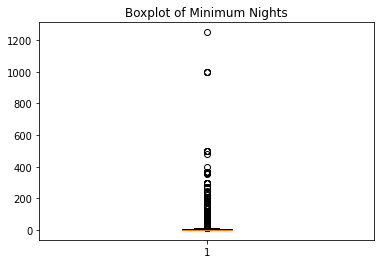

In [16]:
# Visualizing box plot
plt.boxplot(airbnb["minimum_nights"])
plt.title("Boxplot of Minimum Nights")
plt.show()

After seeing above box plot, we can clearly see that **75% listings** have **minimum_nights** less than equal to 5.

In [17]:
# Checking number_of_reviews description
airbnb["number_of_reviews"].describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

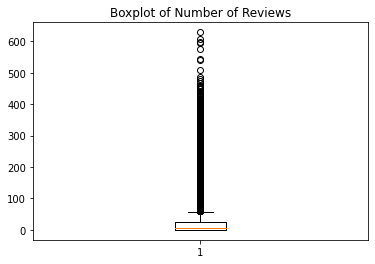

In [18]:
# Visualizing box plot
plt.boxplot(airbnb["number_of_reviews"])
plt.title("Boxplot of Number of Reviews")
plt.show()

After seeing above box plot, we can clearly see that **75% listings** have **number_of_reviews** less than equal to 24.

###Counting outliers

In [19]:
# Subsetting data for required columns.

outliers_count_df = airbnb[["minimum_nights","number_of_reviews"]]


In [20]:
# IQR detection.

q1 = outliers_count_df.quantile(0.25)
q3 = outliers_count_df.quantile(0.75)
iqr = q3 - q1
iqr

minimum_nights        4.0
number_of_reviews    23.0
dtype: float64

In [21]:
# Counting number of outliers from these columns.

outliers_count = ((outliers_count_df < (q1 - 1.5 * iqr)) | (outliers_count_df > (q3 + 1.5 * iqr))).sum()
outliers_count

minimum_nights       6607
number_of_reviews    6021
dtype: int64

Above we can see number of outliers exceeds  **"6000"**. Which is approximately **12%** of our data. Thus we cannot remove these records form our data set.

In [22]:
airbnb.head(5)

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


### 1. Let's start our analysis with "***10 most popular neighbourhood***".

In [23]:
# GROUPING ON "neighbourhood" COLUMN AND COUNTING THE OCCURANCE IN DATASET

neighbourhood_count_df = pd.DataFrame(airbnb.groupby("neighbourhood")["neighbourhood"].count().sort_values(ascending=False)[:10])
neighbourhood_count_df.rename(columns={"neighbourhood":"Count"}, inplace=True)
neighbourhood_count_df.reset_index(inplace=True)

print(f"Most demanding/popular neighbourhood are \n\n {neighbourhood_count_df}")

Most demanding/popular neighbourhood are 

         neighbourhood  Count
0        Williamsburg   3920
1  Bedford-Stuyvesant   3714
2              Harlem   2658
3            Bushwick   2465
4     Upper West Side   1971
5      Hell's Kitchen   1958
6        East Village   1853
7     Upper East Side   1798
8       Crown Heights   1564
9             Midtown   1545


So, we can see that "***Williamsburg***" , "***Bedford-stuyvesant***", "***Harlem***" are most in demand neighbourhoods. 

Let's take a step ahead and plot it graphically on a bar graph to have a visual over difference in popularity.

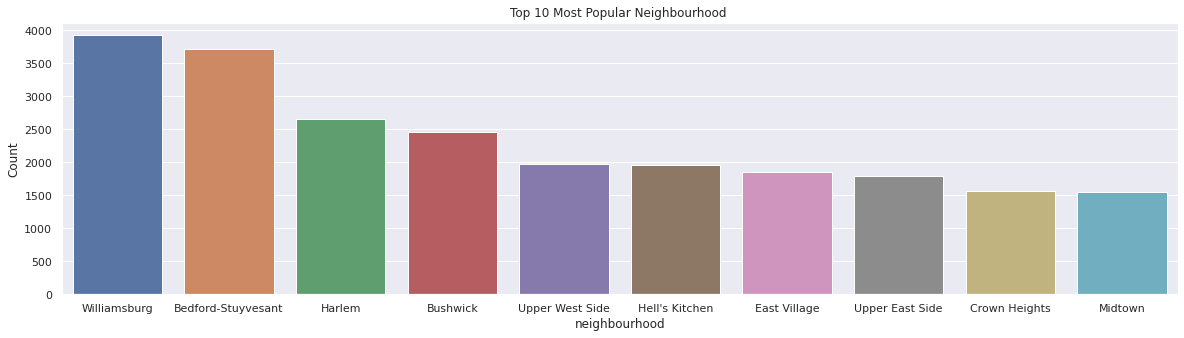

In [24]:
# PLOTTING THE ABOVE QUERY GRAPHICALLY USING "matplotlib"

sns.set(rc={'figure.figsize':(20,5)})
x,y = neighbourhood_count_df["neighbourhood"],neighbourhood_count_df["Count"]
sns.barplot(x,y)
plt.title("Top 10 Most Popular Neighbourhood ")
plt.show()



Looking at the plot above, we can clearly conclude that "***Williamsburg***" and "***Bedford-stuyvesant***" are almost equally popular lying within the count range of ***3500*** and ***4000***.

Also we can observe a considerable count/popularity ***drop*** from "***Bedford-stuyvesant***" to "***Harlem***".

### 2. Let's check ***average price*** for these ***popular neighbourhoods***.

In [25]:
# CALCULATING AVERAGE PRICE OF TOP 10 NEIGHBOUR CITIES (REFFERING ABOVE DATASET)

# CREATING EMPTY LIST TO STORE VALUES IN
top_neighbourhood_list = list(neighbourhood_count_df["neighbourhood"])
avg_neigh_list = []

# HERE WE WILL SUBSET OUR MAIN DATAFRAME(airbnb_df) TO CALCULATE MEAN FOR EACH NEIGHBOURHOOD
for ele in top_neighbourhood_list:
  subset = airbnb[airbnb["neighbourhood"]== ele]
  mean = subset["price"].mean()
  avg_neigh_list.append(mean)

In [26]:
# NOW THAT WE HAVE A LIST, ADD IT TO TOP "neighbourhood_count_df"

neighbourhood_count_df["avg_price"] = avg_neigh_list
neighbourhood_count_df

,neighbourhood,Count,avg_price
0,Williamsburg,3920,143.802806
1,Bedford-Stuyvesant,3714,107.678244
2,Harlem,2658,118.974041
3,Bushwick,2465,84.800406
4,Upper West Side,1971,210.918316
5,Hell's Kitchen,1958,204.794178
6,East Village,1853,186.083108
7,Upper East Side,1798,188.948276
8,Crown Heights,1564,112.480179
9,Midtown,1545,282.719094


Plotting a ***bar graph*** for visual representation.


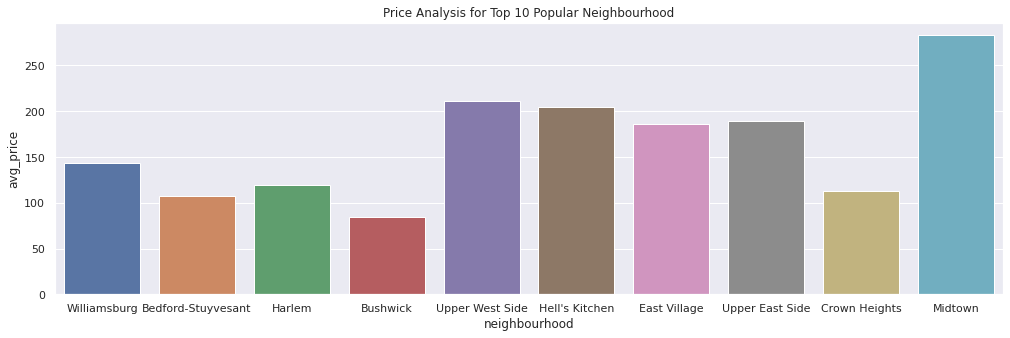

In [27]:
# SIMPLE BAR PLOT OF "neighbourhood" VS "avg_price"

sns.set(rc={'figure.figsize':(17,5)})
x,y = neighbourhood_count_df["neighbourhood"],neighbourhood_count_df["avg_price"]
sns.barplot(x,y)
plt.title("Price Analysis for Top 10 Popular Neighbourhood")
plt.show()

Having a really ***low*** average price for neighbourhood like "***Williamsburg***" , "***Bedford-stuyvesant***", "***Harlem***" tells us why these are the most popular neighbourhood.

### 3. Let's analyse ***count distribution*** of ***different room type*** for ***different neighbourhood groups***.

In [28]:
# COUNT DISTRIBUTION OF DIFFERENT ROOM TYPES FOR DIFFERENT NEIGHBOURHOOD GROUPS

room_neigh_freq = pd.DataFrame(airbnb.groupby('neighbourhood_group')['room_type'].value_counts().unstack())
room_neigh_freq

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


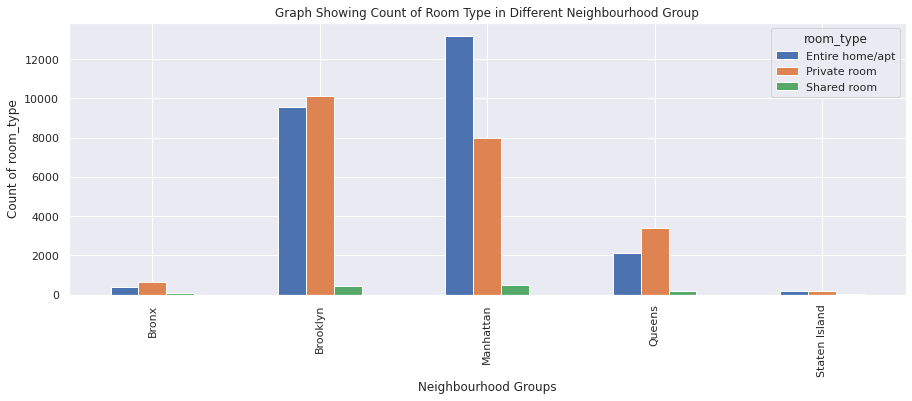

In [29]:
# SIMPLE BAR GRAPH FOR ABOVE DATAFRAME

room_neigh_freq.plot(kind="bar", figsize=(15,5))
plt.ylabel('Count of room_type')
plt.xlabel('Neighbourhood Groups')
plt.title('Graph Showing Count of Room Type in Different Neighbourhood Group')
plt.show()

From above graph, we clearly see that **Manhattan** has maximun number of airbnbs.

Also, in every neighbourhood group we can observe that "***Entire Home/apt***" and "***Private Rooms***" are way greater in count compared to "***Shared Rooms***".

### 4. Analysis of ***aggregate price*** of ***different room type for each neighbourhood groups***.

In [30]:
# AGGREGATE PRICE OF "room_type" OVER EACH "neighbourhood_group"

agg_price_neigh_group = pd.DataFrame(airbnb.groupby(['neighbourhood_group','room_type'])['price'].agg(np.mean).unstack())
agg_price_neigh_group

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


Let's make the above dataframe a little easier to analyse.

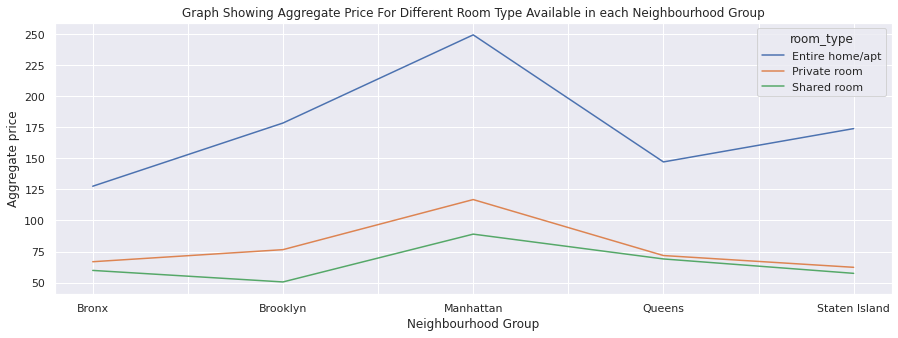

In [31]:
# Plotting line graph
agg_price_neigh_group.plot(kind="line", figsize=(15,5))

plt.ylabel('Aggregate price')
plt.xlabel('Neighbourhood Group')
plt.title("Graph Showing Aggregate Price For Different Room Type Available in each Neighbourhood Group")

plt.show()

By seeing above, it clearly visible that **Manahttan** is neighbourhood group which have ***highest* aggregate price** in all room types(**entire home/private room/shared room**).

But if we talk about lowest aggregate price over different room types, then we notice in case of **Entire room/apt *lowest* aggregate price** is in **'Bronx'**, in case of **private room 'Staten Island'** and in case of **shared room 'Brookyln'** is having ***lowest* aggregate price**.

### 5.  Let's find out, which ***room type*** was ***more prefered*** and which was ***least prefered***.

In [32]:
#DIFFERENT TYPES OF "room_types"

airbnb["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [33]:
# GROUPING AND COUNTING

room_types_df = pd.DataFrame(airbnb.groupby("room_type")["room_type"].count())
room_types_df.rename(columns={"room_type":"Count"}, inplace=True)

room_types_df

,Count
room_type,
Entire home/apt,25409
Private room,22326
Shared room,1160


Let's plot a ***pie chart*** with ***percentage distribution***. 

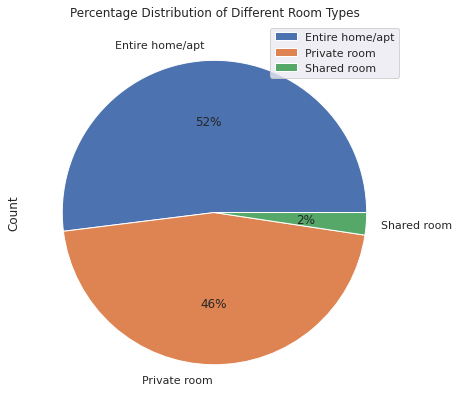

In [34]:
# PLOTTING PIE CHART USING MATPLOTLIB

room_types_df.plot.pie(y='Count', figsize=(7, 7), autopct='%.0f%%')
plt.title("Percentage Distribution of Different Room Types")
plt.show()

Alright, we can clearly see that "**Entire home/apt**" type is the most in demand room type. Followed by "**Private room**".
"**Shared room**" type is the least preferred room type.

### 6. Let's now analyse relation between "**minimum_nights**" and "**number_of_reviews**".

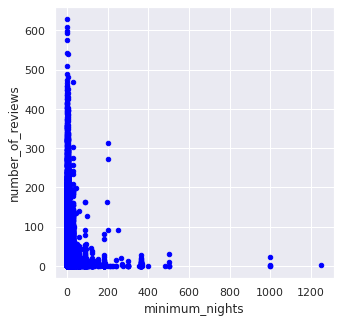

In [35]:
# USING SCATTER PLOT TO VISUALLY SEE THE RELATION

room_price_df = pd.concat([airbnb["minimum_nights"], airbnb["number_of_reviews"]], axis=1)
room_price_df.plot.scatter(x="minimum_nights", y="number_of_reviews", figsize=(5,5), color = "Blue")
plt.show()

Looking at the figure above, we can conclude most of listings have "***minimum stay as Zero***", also number of reviews for these listings is lot more.

Above we analyse a very simple "***Scatterplot***", now taking a step ahead and using "***Scatterplot***" in a very interesting way.

In [36]:
airbnb.head(2)

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


### 7. Scatter Plot to graph **longitude** and **latitude** in different neighbourhood groups.

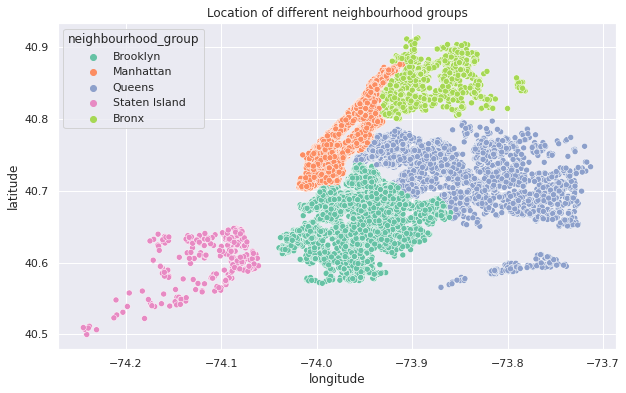

In [37]:
# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_group, palette='Set2')
plt.title("Location of different neighbourhood groups")
plt.show()

Looking over above plot, we can depict that the **ratio** of number of airbnbs to area is **highest** for **Manhattan**.

### 8. Plotting airbnbs with ***reviews below "10"***.

In [38]:
# LET'S SUBSET OUR MAIN DATASET FIRST, HAVING LEAST NUMBER OF REVIEWS

least_review_listings = pd.DataFrame(airbnb[airbnb["number_of_reviews"] < 10])
low_reviwed_listings = least_review_listings["number_of_reviews"].count() + 1
print(f"Total listings with reviews less than 10 are {low_reviwed_listings}")

Total listings with reviews less than 10 are 29521


In [39]:
# TOTAL LISTINGS IN ORIGNAL DATASET

total_listings = airbnb["number_of_reviews"].count() + 1

# PERCENATGE OF LOW REVIEWS LISTINGS TO TOTAL LISTINGS

per_low_listings = (low_reviwed_listings/total_listings)*100
print(f"Percentage of low reviewed listings to total listings are {per_low_listings}")

Percentage of low reviewed listings to total listings are 60.37508180628273


Well, this is really surprising. "***60%***" of listings got less than **10** reviews by the visitors. 

Let'S plot it over "***NYC***"

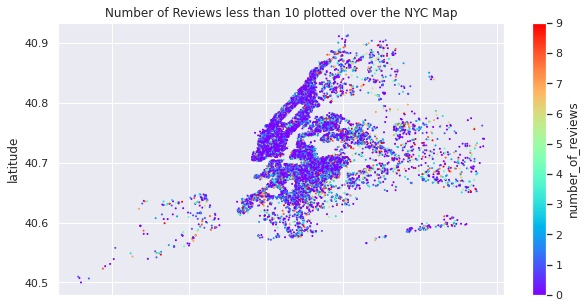

In [40]:
# Plotting scatter graph
least_review_listings.plot.scatter(x = "longitude", y = "latitude", c ="number_of_reviews", cmap = plt.get_cmap("rainbow"), s = 1, figsize = (10,5))
plt.title("Number of Reviews less than 10 plotted over the NYC Map")

plt.show()

### 9. Let's now find ***top 10 host id's*** with most number of listings.

In [41]:
# COUNTING NO OF TIMES AN "id" OCCURS IN DATASET

top_host_ids = pd.DataFrame(airbnb.groupby("host_id")["host_id"].count().sort_values(ascending=False)[:10])
top_host_ids.rename(columns={"host_id":"host_id_count"}, inplace=True)
top_host_ids

,host_id_count
host_id,
219517861,327
107434423,232
30283594,121
137358866,103
16098958,96
12243051,96
61391963,91
22541573,87
200380610,65


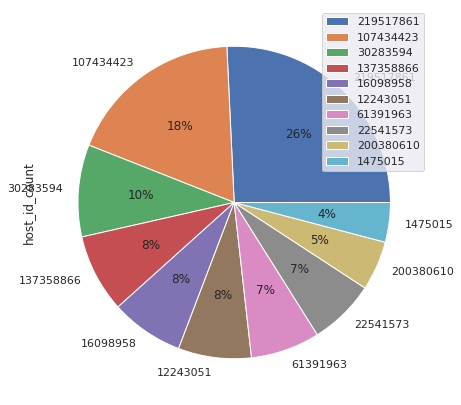

In [42]:
# PLOTTING PIE CHART USING MATPLOTLIB

top_host_ids.plot.pie(y='host_id_count', figsize=(7, 20), autopct='%.0f%%')
plt.show()

Simply looking at this chart, it's easy to conclude:
-- id no "***219517861***" had most listings and also had ***26%***(majority) in top ***10*** listings.

### 10. Let's check **average availability** of Airbnbs **throughout year** for different **neighbourhood Group**.

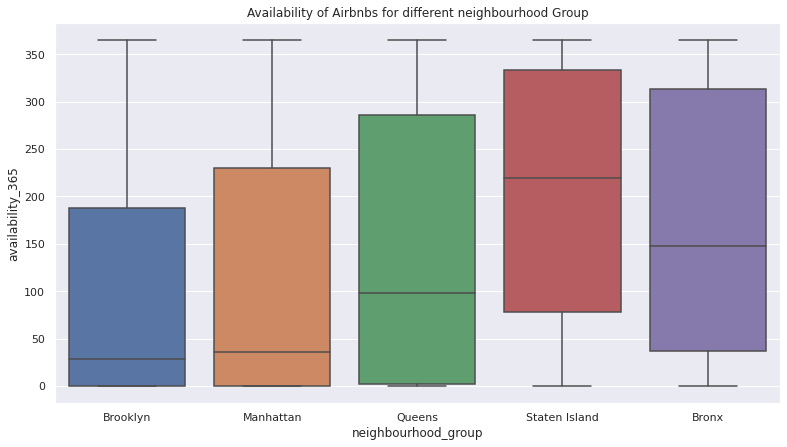

In [43]:
# Using a boxplot for better visual

plt.figure(figsize=(13,7))
sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365')
plt.title("Availability of Airbnbs for different neighbourhood Group")
plt.show()

In above box plot, we can observe how mean of our data fluctuates vastly for each neighbourhood. Where, mean room availability, in days throughout the year, is over **200 days**(6.5 months approx) in  **Staten Island**. Followed by **Bronx** having mean around **150 days**(5 months approx). 
Also, **Manhattan** and **Brooklyn** have low availability of rooms throughout the year compared to other neighbourhood.

### 11. Now let's list those airbnbs which are ***available 365 days*** with ***good ratings***.

In [44]:
# SUBSET USING CONDITIONS

top_avalible_365 = airbnb[airbnb["availability_365"] >= 365].sort_values("number_of_reviews", ascending=False)[:10]
                                                                                                            
top_avalible_365

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
235,60611,SpaHa Studio Monthly Rental,292204,Manhattan,East Harlem,40.79163,-73.94573,Entire home/apt,125,28,183,1.83,2,365
13725,10316551,Brooklyn Queen Bed,33213436,Brooklyn,Gowanus,40.67843,-73.98393,Private room,99,1,176,4.14,8,365
22011,17707963,"5mins from JFK, one cozy bedroom for one",119592255,Queens,Jamaica,40.68090,-73.78196,Private room,50,1,173,6.15,2,365
366,103806,BOHEMIAN EAST VILLAGE 2 BED HAVEN,251176,Manhattan,East Village,40.72577,-73.98745,Entire home/apt,249,5,166,1.68,2,365
13610,10185955,Blue Magic,14785032,Queens,St. Albans,40.69112,-73.77761,Private room,48,1,165,4.64,1,365
21979,17682843,"Astoria close to JFK,Laguardia airport, Manhattan",117195769,Queens,Astoria,40.76505,-73.90918,Private room,80,1,161,5.74,3,365
3299,1971540,Sunny Midtown NYC Room,10179999,Manhattan,Upper West Side,40.77021,-73.98721,Private room,150,1,157,2.49,1,365
5109,3674757,Cozy Vintage Artist Flat(Williamsburg/Bushwick),2702080,Brooklyn,Bedford-Stuyvesant,40.69160,-73.94714,Private room,77,2,145,2.42,1,365
1605,728498,WEST HARLEM PRIVATE BEDROOM,3779334,Manhattan,Harlem,40.80517,-73.95404,Private room,80,1,135,1.67,1,365
1344,591135,Awesome Place! Amazing Location!!!,1523018,Manhattan,SoHo,40.72466,-73.99632,Private room,125,1,132,1.75,1,365


These are the top 10 most reviewed listings which are ***open throughout the year***.

### 12. Finally, We are going to analyse ***correlation between all "INT" and "FLOAT"*** variables/columns.

In [45]:
# SUBSETTING ORIGNAL DATASET WITH ONLY "INT" AND "FLOAT" VARIABLES/COLUMNS

airbnb_data = airbnb[["price","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count", "availability_365"]]
corr_df = airbnb_data.corr()
corr_df

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


Analysing above dataset using ***heat map***.

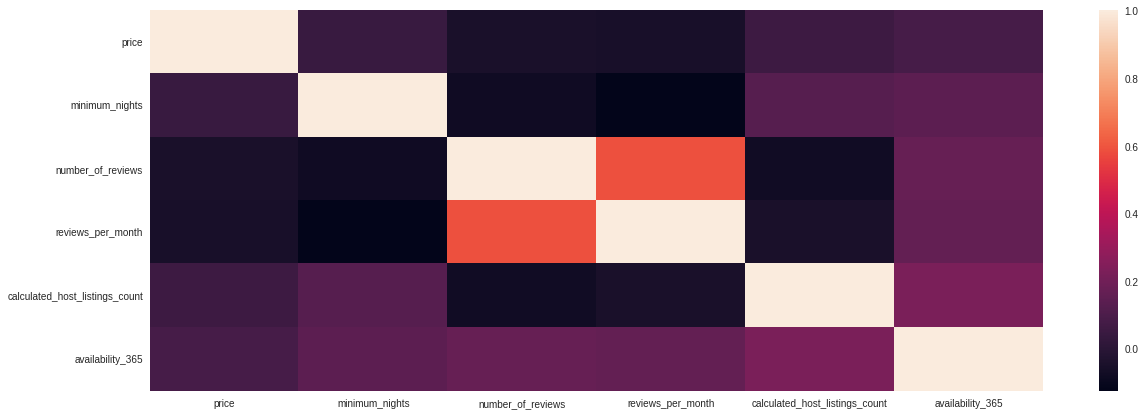

In [46]:
# Plotting heat map
plt.style.use("seaborn")
plt.figure(figsize =(20,7))
sns.heatmap(corr_df)
plt.show()

By above graph, we can conclude that variables are **slightly** correlated with each other apart from **number_of_reviews** and **reviews_per_month** which are **much likely** correlated with each other.

### **Summary**

1. "Williamsburg" and "Bedford-stuyvesant" are most popular neighbourhoods. Average price for these neighbourhood is quite lower in comparison to other neighbourhood cities, which could be the reason behind customers might preferred to stay in these neighbourhoods.

2. Among all the 5 neighbourhood groups “Manhattan” has the maximum numbers of listings, also average price over different room types is quite higher than other groups, so we can conclude that Manhattan might be posh area to stay.  

3. In our dataset, 98% listings are of Entire home/apt or Private room, and 2% listings are of Shared room, which we can say that most visited customers might use airbnb for family stay purpose and only few customers belong to solo traveller.

4. In our dataset, out of around 49K, approx 13K airbnb listings have minimum nights as 1, which gives us an idea that customers might prefer to book airbnb for short time period.

5. It is quite surprising that 60% of listings in dataset have number_of_reviews less than 10, which seems very low numbers of reviews.

Thank you
